In [ ]:
import os
from google.colab import drive; 
drive.mount("/content/drive/")
os.chdir("/content/drive/My Drive/Colab Notebooks/DL")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**add correct path**

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/DL")
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset


**Using bias from a random normal distribution with given standard deviation.**

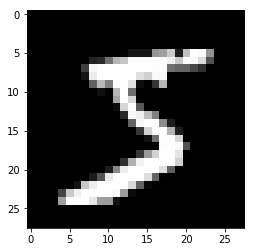

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
# W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
# b = tf.Variable(np.zeros(10, dtype=np.float32))
train_steps = 10000
learning_rate = 0.01
feature_size = 784
num_neurons = 512
num_classes = 10 
Bias = {"b0":tf.Variable(tf.random.normal([num_neurons],stddev = .1)),
        "b1":tf.Variable(tf.random.normal([num_classes],stddev = .1))
        }
W = {"W0":tf.Variable(tf.random.normal([feature_size,num_neurons],stddev=.1)),
     "W1":tf.Variable(tf.random.normal([num_neurons,10],stddev=.1)),
    }




**Training using gradient tape with an input layer an output layer and an Hiddenlayer with Relu activation.**



In [ ]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape(persistent=True) as tape:
        
        input_layer = tf.matmul(img_batch, W['W0']) +Bias['b0']
        hidden_layer = tf.nn.relu(input_layer)
        output_layer = (tf.matmul(hidden_layer,W['W1']+Bias['b1']))
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=output_layer, labels=lbl_batch))
        

    grads = tape.gradient(xent, [Bias['b1'],W['W0'],Bias['b0'],W['W1']])
    
    Bias['b1'].assign_sub(learning_rate * tf.cast(grads[0],tf.float32))

    W['W0'].assign_sub(learning_rate * grads[1])
    Bias['b0'].assign_sub(learning_rate * grads[2])
    W['W1'].assign_sub(learning_rate * grads[3])
         
    if not step % 100:
        preds = tf.argmax(output_layer, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 33.00373077392578 Accuracy: 0.0703125
Loss: 1.9820148944854736 Accuracy: 0.3359375
Loss: 1.5133476257324219 Accuracy: 0.609375
Loss: 1.2679803371429443 Accuracy: 0.703125
Loss: 1.0363683700561523 Accuracy: 0.703125
Starting new epoch...
Loss: 0.691347599029541 Accuracy: 0.828125
Loss: 0.6502552032470703 Accuracy: 0.828125
Loss: 0.5786261558532715 Accuracy: 0.8515625
Loss: 0.5692861080169678 Accuracy: 0.8203125
Loss: 0.5730807781219482 Accuracy: 0.8515625
Starting new epoch...
Loss: 0.8507442474365234 Accuracy: 0.71875
Loss: 0.5675575137138367 Accuracy: 0.8359375
Loss: 0.49967095255851746 Accuracy: 0.84375
Loss: 0.42704057693481445 Accuracy: 0.828125
Loss: 0.4887896180152893 Accuracy: 0.8515625
Starting new epoch...
Loss: 0.2970004677772522 Accuracy: 0.9375
Loss: 0.520378589630127 Accuracy: 0.875
Loss: 0.38044577836990356 Accuracy: 0.890625
Loss: 0.42373180389404297 Accuracy: 0.8828125
Starting new epoch...
Loss: 0.32233744859695435 Accuracy: 0.90625
Loss: 0.3837887644767761 Accur